In [1]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [2]:
# default delta is large because that makes it fast,
# and it illustrates the correct registration between image and contours
delta = 0.5
extent = (-3, 4, -4, 3)

In [3]:
x, y = np.meshgrid(np.arange(-3.0, 4.001, delta), np.arange(-4.0, 3.001, delta))
z1 = np.exp(-x ** 2 - y ** 2)
z2 = np.exp(-(x - 1) ** 2 - (y - 1) ** 2)
z = (z1 - z2) * 2

In [4]:
# boost the upper limit to avoid truncation errors
levels = np.arange(-2.0, 1.601, 0.4)
norm = cm.colors.Normalize(vmax=abs(z).max(), vmin=-abs(z).max())
cmap = cm.PRGn

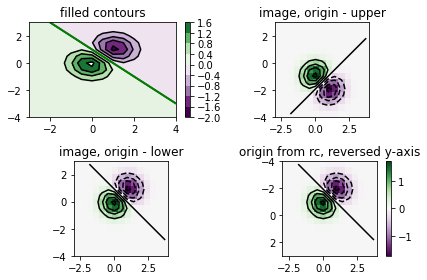

In [5]:
fig, _axs = plt.subplots(nrows=2, ncols=2)
fig.subplots_adjust(hspace=0.3)
axs = _axs.flatten()

cset1 = axs[0].contourf(x, y, z, levels, norm=norm, cmap=cm.get_cmap(cmap, len(levels) - 1))
# It is not necessary, but for the colormap, we need only the number of levels minus 1
# To avoid discretization error, use either this number or a large number such as the default (256)

# If we want lines as well as filled regions, we need to call contour separately
# don't try to change the edgecolor or edgewidth of the polygons in the collections returned by contourf
# use levels output from previous call to guarantee they are the same

cset2 = axs[0].contour(x, y, z, cset1.levels, colors="k")

# we don't really need dashed contour lines to indicate negative regions,
# so let's turn them off

for c in cset2.collections:
    c.set_linestyle("solid")

# It is easier here to make a separate call to contour than
# to set up an array of colors and linewidths

# we are making a thick green line as a zero contour
# specify the zero level as a tuple with only 0 in it

cset3 = axs[0].contour(x, y, z, (0, ), colors="g", linewidths=2)
axs[0].set_title("filled contours")
fig.colorbar(cset1, ax=axs[0])

axs[1].imshow(z, extent=extent, cmap=cmap, norm=norm)
axs[1].contour(z, levels, colors="k", origin="upper", extent=extent)
axs[1].set_title("image, origin - upper")

axs[2].imshow(z, origin="lower", extent=extent, cmap=cmap, norm=norm)
axs[2].contour(z, levels, colors="k", origin="lower", extent=extent)
axs[2].set_title("image, origin - lower")

# we will use the interpolation "nearest" here to show the actual image pixels
# note that the contour lines don't extend to the edge of the box

# this is intentional, the Z values are defined at the center of each
# image pixel (each color block on the following subplot), so the
# domain that is contoured does not extend beyond these pixel centers
im = axs[3].imshow(z, interpolation="nearest", extent=extent, cmap=cmap, norm=norm)

axs[3].contour(z, levels, colors="k", origin="image", extent=extent)
ylim = axs[3].get_ylim()
axs[3].set_ylim(ylim[::-1])
axs[3].set_title("origin from rc, reversed y-axis")
fig.colorbar(im, ax=axs[3])

fig.tight_layout()
plt.show()